In [43]:
import numpy as np
import matplotlib.pyplot as plt

In [44]:
def func(c, N, h):
    s1 = 0
    s2 = 0
    s3 = 0
    s4 = 0
    
    for j in range(N):
        c_jm1 = c[j - 1] if j > 0 else 0.0      # c_(j - 1)
        c_jp1 = c[j + 1] if j < N - 1 else 0.0  # c_(j + 1)
        c_j = c[j]
        
        s1 += c_j**2  - c_j * c_jm1 - c_j * c_jp1
        s2 += 1 / 3 * c_j**2 + 1 / 6 * c_j * c_jm1 + 1 / 6 * c_j * c_jp1
        s3 += np.arctan((j + 1) * h) * np.sin(2 * c_j)
        s4 += c_j
        
    result = 1 / h * s1 + 9 * h * s2 - h / 2 * s3 - h * s4    
    
    return result
    

def grad(c, N, h):
    result = np.copy(c)
    
    # Рассчитаем по очереди все c_j
    for j in range(N):
        c_jm1 = c[j - 1] if j > 0 else 0.0      # c_(j - 1)
        c_jp1 = c[j + 1] if j < N - 1 else 0.0  # c_(j + 1)
        c_j = c[j]
        
        s1 = 2 * c_j - c_jm1 - c_jp1
        s2 = 2 / 3 * c_j + 1 / 6 * c_jm1 + 1 / 6 * c_jp1
        s3 = 0
                
        for k in range(N):
            s3 += np.arctan((k + 1) * h) * np.cos(2 * c[k])
        
        result[j] = 1 / h * s1 + 9 * h * s2 - h * s3 - h
        
    return result
        

In [49]:
def gradient_descent(c_0, func, grad, N, h, tolerance, max_steps=100):    
    c_k = np.copy(c_0)
    c_kp1 = np.array(len(c_0))
    
    for i in range(max_steps):
        w = 1             
        
        c_kp1 = c_k - w * h * grad(c_k, N, h)
        
        while func(c_kp1, N, h) > func(c_k, N ,h):
            w = w / 2
            c_kp1 = c_k - w * h * grad(c_k, N, h)
        
        if np.linalg.norm(c_kp1 - c_k) < tolerance:
            break        
            
        c_k = np.copy(c_kp1)

    return c_kp1

In [45]:
N = 99
xs = np.linspace(0,1,N)
h = 1/(N - 1)
j = np.arange(N)
c_0 = (-np.exp(3-3*j*h) - np.exp(3*j*h) + 1 + np.exp(3))/(9 + 9* np.exp(3))

In [46]:
def e(xs):
    res = np.copy(xs)
    
    for i, x in enumerate(xs):
        if -1 <= x and x < 0:
            res[i] = x + 1
        elif 0 <= x and x <= 1:
            res[i] = 1 - x
        else: 
            res[i] = 0
            
    return res

In [47]:
def u(x,c,e):
    result = 0
    for i in range(N):
        result += c[i] * e(x/h-i+1)
    return result

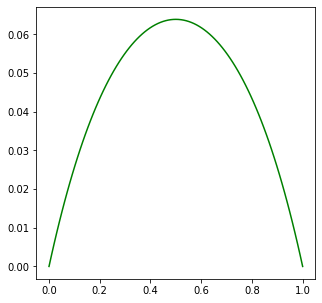

In [7]:
plt.figure(figsize=(5, 5))
plt.plot(xs, c_0, 'g')

In [50]:
tol = 0.001
res = gradient_descent(c_0, func, grad, N, h, tol, max_steps=10000)


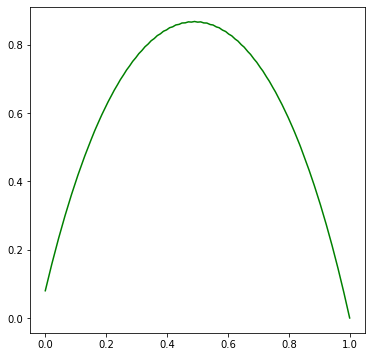

In [51]:
xs_u = np.linspace(0, 1, 10 * N)
plt.figure(figsize=(6, 6))
plt.plot(xs_u, u(xs_u, res, e), 'g')